# Deep Learning
## HW3

---

Name: <font face="Times" size=4 color=orange> Mohammad Bagher Soltani
<font face="Times" size=3 color=black>
    
S.No.: <font face="Times" size=4 color=orange> 98105813

---

## 1. *Import libraries*

In [167]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

## 2. *Load data*

In [168]:
data_csv = pd.read_csv("Data.csv")
data = data_csv.iloc[:,1:2]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## 3. *Training and test data*

In [169]:
x, y = [], []
seq_len = 4
for i in range(len(data)-seq_len-1):
    x.append(np.array(data[i:(i+seq_len)]))
    y.append(np.array(data[i+seq_len]))

train_size = int(len(x) * 0.8)
test_size = len(x) - train_size
####################
# YOUR CODE
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size, random_state=42)

x_train = torch.Tensor(x_train).unsqueeze(dim=2)
x_test = torch.Tensor(x_test).unsqueeze(dim=2)


y_train = torch.Tensor(y_train).unsqueeze(dim=1).unsqueeze(dim=1)
y_test = torch.Tensor(y_test).unsqueeze(dim=1).unsqueeze(dim=1)
####################

## 4. *Build the structure of models*

In [170]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        ####################
        # YOUR CODE
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.target = nn.Linear(hidden_size, output_size)
        ####################

    def forward(self, x):
        ####################
        lstm_out, hidden = self.lstm(x.view(len(x), 1, -1))
        out = self.target(hidden[0])
        return out
        ####################

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        ####################
        # YOUR CODE
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.target = nn.Linear(hidden_size, output_size)
        ####################

    def forward(self, x):
        ####################
        # YOUR CODE
        gru_out, hidden = self.gru(x.view(len(x), 1, -1))
        out = self.target(hidden[0])
        return out
        ####################


## 5. *Train and test the models*






In [171]:
input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

num_epochs = 500
learning_rate = 1e-2
 
####################
# YOUR CODE
net_args = [input_size, hidden_size, num_layers, output_size]
lstm = LSTM(*net_args)
gru = GRU(*net_args)
criterion = nn.MSELoss()
lstm_optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
gru_optimizer = torch.optim.Adam(gru.parameters(), lr=learning_rate)
####################

def train_test(model, criterion, optimizer, x_train, y_train, num_epochs, learning_rate):
    epochs = np.zeros(num_epochs)
    train_losses = np.zeros(num_epochs)
    test_losses = np.zeros(num_epochs)
 
    for epoch in range(num_epochs):
        # Train the model
        ####################
        # YOUR CODE
        ####################
        train_loss = 0.0
        model.train()
        for _, (data, target) in enumerate(zip(x_train, y_train)):
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            train_loss += loss.detach()
            loss.backward()
            optimizer.step()
        # Test the model
        ####################
        # YOUR CODE
        test_loss = 0.0
        model.eval()
        with torch.no_grad():
            for _, (data, target) in enumerate(zip(x_test, y_test)):
                out = model(data)
                loss = criterion(out, target)
                test_loss += loss.detach()
        
        epochs[epoch] = epoch
        train_losses[epoch] = train_loss
        test_losses[epoch] = test_loss
        ####################
        
        print('Epoch: {0} , Train_loss: {1:.5f} , Test_loss: {2:.5f}'.format(epoch+1, train_loss, test_loss))

    return epochs, train_losses, test_losses

In [172]:
lstm_epochs, lstm_train_losses, lstm_test_losses = train_test(lstm, criterion, lstm_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 4.63285 , Test_loss: 0.75340
Epoch: 2 , Train_loss: 1.27673 , Test_loss: 0.31272
Epoch: 3 , Train_loss: 1.00466 , Test_loss: 0.28472
Epoch: 4 , Train_loss: 0.93401 , Test_loss: 0.26036
Epoch: 5 , Train_loss: 0.86802 , Test_loss: 0.23852
Epoch: 6 , Train_loss: 0.80783 , Test_loss: 0.21936
Epoch: 7 , Train_loss: 0.75433 , Test_loss: 0.20305
Epoch: 8 , Train_loss: 0.70764 , Test_loss: 0.18958
Epoch: 9 , Train_loss: 0.66717 , Test_loss: 0.17870
Epoch: 10 , Train_loss: 0.63202 , Test_loss: 0.17002
Epoch: 11 , Train_loss: 0.60131 , Test_loss: 0.16315
Epoch: 12 , Train_loss: 0.57438 , Test_loss: 0.15767
Epoch: 13 , Train_loss: 0.55092 , Test_loss: 0.15325
Epoch: 14 , Train_loss: 0.53085 , Test_loss: 0.14965
Epoch: 15 , Train_loss: 0.51426 , Test_loss: 0.14669
Epoch: 16 , Train_loss: 0.50111 , Test_loss: 0.14430
Epoch: 17 , Train_loss: 0.49115 , Test_loss: 0.14243
Epoch: 18 , Train_loss: 0.48389 , Test_loss: 0.14103
Epoch: 19 , Train_loss: 0.47870 , Test_loss: 0.14004
Ep

Epoch: 155 , Train_loss: 0.39582 , Test_loss: 0.11116
Epoch: 156 , Train_loss: 0.39592 , Test_loss: 0.11089
Epoch: 157 , Train_loss: 0.39604 , Test_loss: 0.11062
Epoch: 158 , Train_loss: 0.39617 , Test_loss: 0.11036
Epoch: 159 , Train_loss: 0.39632 , Test_loss: 0.11011
Epoch: 160 , Train_loss: 0.39649 , Test_loss: 0.10985
Epoch: 161 , Train_loss: 0.39668 , Test_loss: 0.10960
Epoch: 162 , Train_loss: 0.39688 , Test_loss: 0.10934
Epoch: 163 , Train_loss: 0.39709 , Test_loss: 0.10909
Epoch: 164 , Train_loss: 0.39731 , Test_loss: 0.10885
Epoch: 165 , Train_loss: 0.39754 , Test_loss: 0.10860
Epoch: 166 , Train_loss: 0.39778 , Test_loss: 0.10836
Epoch: 167 , Train_loss: 0.39802 , Test_loss: 0.10812
Epoch: 168 , Train_loss: 0.39826 , Test_loss: 0.10789
Epoch: 169 , Train_loss: 0.39850 , Test_loss: 0.10766
Epoch: 170 , Train_loss: 0.39874 , Test_loss: 0.10744
Epoch: 171 , Train_loss: 0.39898 , Test_loss: 0.10722
Epoch: 172 , Train_loss: 0.39921 , Test_loss: 0.10701
Epoch: 173 , Train_loss: 0.3

Epoch: 308 , Train_loss: 0.39113 , Test_loss: 0.10159
Epoch: 309 , Train_loss: 0.39103 , Test_loss: 0.10159
Epoch: 310 , Train_loss: 0.39094 , Test_loss: 0.10159
Epoch: 311 , Train_loss: 0.39085 , Test_loss: 0.10159
Epoch: 312 , Train_loss: 0.39075 , Test_loss: 0.10159
Epoch: 313 , Train_loss: 0.39066 , Test_loss: 0.10159
Epoch: 314 , Train_loss: 0.39057 , Test_loss: 0.10159
Epoch: 315 , Train_loss: 0.39047 , Test_loss: 0.10159
Epoch: 316 , Train_loss: 0.39038 , Test_loss: 0.10159
Epoch: 317 , Train_loss: 0.39029 , Test_loss: 0.10159
Epoch: 318 , Train_loss: 0.39019 , Test_loss: 0.10159
Epoch: 319 , Train_loss: 0.39010 , Test_loss: 0.10159
Epoch: 320 , Train_loss: 0.39000 , Test_loss: 0.10159
Epoch: 321 , Train_loss: 0.38991 , Test_loss: 0.10159
Epoch: 322 , Train_loss: 0.38981 , Test_loss: 0.10159
Epoch: 323 , Train_loss: 0.38972 , Test_loss: 0.10159
Epoch: 324 , Train_loss: 0.38963 , Test_loss: 0.10159
Epoch: 325 , Train_loss: 0.38953 , Test_loss: 0.10159
Epoch: 326 , Train_loss: 0.3

Epoch: 460 , Train_loss: 0.37698 , Test_loss: 0.09918
Epoch: 461 , Train_loss: 0.37688 , Test_loss: 0.09915
Epoch: 462 , Train_loss: 0.37677 , Test_loss: 0.09911
Epoch: 463 , Train_loss: 0.37666 , Test_loss: 0.09907
Epoch: 464 , Train_loss: 0.37655 , Test_loss: 0.09903
Epoch: 465 , Train_loss: 0.37643 , Test_loss: 0.09900
Epoch: 466 , Train_loss: 0.37632 , Test_loss: 0.09896
Epoch: 467 , Train_loss: 0.37620 , Test_loss: 0.09892
Epoch: 468 , Train_loss: 0.37609 , Test_loss: 0.09888
Epoch: 469 , Train_loss: 0.37597 , Test_loss: 0.09885
Epoch: 470 , Train_loss: 0.37584 , Test_loss: 0.09881
Epoch: 471 , Train_loss: 0.37572 , Test_loss: 0.09878
Epoch: 472 , Train_loss: 0.37560 , Test_loss: 0.09874
Epoch: 473 , Train_loss: 0.37547 , Test_loss: 0.09871
Epoch: 474 , Train_loss: 0.37534 , Test_loss: 0.09867
Epoch: 475 , Train_loss: 0.37521 , Test_loss: 0.09864
Epoch: 476 , Train_loss: 0.37508 , Test_loss: 0.09860
Epoch: 477 , Train_loss: 0.37495 , Test_loss: 0.09857
Epoch: 478 , Train_loss: 0.3

In [173]:
gru_epochs, gru_train_losses, gru_test_losses = train_test(gru, criterion, gru_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 5.12523 , Test_loss: 1.15463


/home/soltani/anaconda3/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 2 , Train_loss: 1.55882 , Test_loss: 0.19773
Epoch: 3 , Train_loss: 0.67852 , Test_loss: 0.17254
Epoch: 4 , Train_loss: 0.62048 , Test_loss: 0.16238
Epoch: 5 , Train_loss: 0.59141 , Test_loss: 0.15681
Epoch: 6 , Train_loss: 0.57376 , Test_loss: 0.15320
Epoch: 7 , Train_loss: 0.56150 , Test_loss: 0.15055
Epoch: 8 , Train_loss: 0.55213 , Test_loss: 0.14845
Epoch: 9 , Train_loss: 0.54451 , Test_loss: 0.14670
Epoch: 10 , Train_loss: 0.53799 , Test_loss: 0.14520
Epoch: 11 , Train_loss: 0.53217 , Test_loss: 0.14389
Epoch: 12 , Train_loss: 0.52673 , Test_loss: 0.14273
Epoch: 13 , Train_loss: 0.52145 , Test_loss: 0.14166
Epoch: 14 , Train_loss: 0.51616 , Test_loss: 0.14066
Epoch: 15 , Train_loss: 0.51075 , Test_loss: 0.13971
Epoch: 16 , Train_loss: 0.50518 , Test_loss: 0.13877
Epoch: 17 , Train_loss: 0.49946 , Test_loss: 0.13784
Epoch: 18 , Train_loss: 0.49366 , Test_loss: 0.13690
Epoch: 19 , Train_loss: 0.48795 , Test_loss: 0.13597
Epoch: 20 , Train_loss: 0.48253 , Test_loss: 0.13507
E

Epoch: 156 , Train_loss: 0.38291 , Test_loss: 0.14628
Epoch: 157 , Train_loss: 0.36557 , Test_loss: 0.14183
Epoch: 158 , Train_loss: 0.37389 , Test_loss: 0.14367
Epoch: 159 , Train_loss: 0.37493 , Test_loss: 0.14516
Epoch: 160 , Train_loss: 0.37429 , Test_loss: 0.14698
Epoch: 161 , Train_loss: 0.37249 , Test_loss: 0.14623
Epoch: 162 , Train_loss: 0.36937 , Test_loss: 0.14283
Epoch: 163 , Train_loss: 0.36527 , Test_loss: 0.13737
Epoch: 164 , Train_loss: 0.36395 , Test_loss: 0.13096
Epoch: 165 , Train_loss: 0.36868 , Test_loss: 0.12785
Epoch: 166 , Train_loss: 0.37740 , Test_loss: 0.12924
Epoch: 167 , Train_loss: 0.38666 , Test_loss: 0.14341
Epoch: 168 , Train_loss: 0.40824 , Test_loss: 0.16017
Epoch: 169 , Train_loss: 0.43028 , Test_loss: 0.17629
Epoch: 170 , Train_loss: 0.45256 , Test_loss: 0.12985
Epoch: 171 , Train_loss: 0.37491 , Test_loss: 0.14507
Epoch: 172 , Train_loss: 0.35806 , Test_loss: 0.13955
Epoch: 173 , Train_loss: 0.36856 , Test_loss: 0.14203
Epoch: 174 , Train_loss: 0.3

Epoch: 308 , Train_loss: 0.36107 , Test_loss: 0.12193
Epoch: 309 , Train_loss: 0.36375 , Test_loss: 0.11761
Epoch: 310 , Train_loss: 0.36801 , Test_loss: 0.11991
Epoch: 311 , Train_loss: 0.58572 , Test_loss: 0.32776
Epoch: 312 , Train_loss: 0.68613 , Test_loss: 0.18122
Epoch: 313 , Train_loss: 0.37042 , Test_loss: 0.12016
Epoch: 314 , Train_loss: 0.33900 , Test_loss: 0.12202
Epoch: 315 , Train_loss: 0.33363 , Test_loss: 0.12250
Epoch: 316 , Train_loss: 0.34210 , Test_loss: 0.12498
Epoch: 317 , Train_loss: 0.35001 , Test_loss: 0.12652
Epoch: 318 , Train_loss: 0.35420 , Test_loss: 0.12603
Epoch: 319 , Train_loss: 0.35602 , Test_loss: 0.12389
Epoch: 320 , Train_loss: 0.35983 , Test_loss: 0.12687
Epoch: 321 , Train_loss: 0.39207 , Test_loss: 0.15522
Epoch: 322 , Train_loss: 0.43865 , Test_loss: 0.12404
Epoch: 323 , Train_loss: 0.36458 , Test_loss: 0.12271
Epoch: 324 , Train_loss: 0.34565 , Test_loss: 0.13080
Epoch: 325 , Train_loss: 0.38805 , Test_loss: 0.13359
Epoch: 326 , Train_loss: 0.3

Epoch: 460 , Train_loss: 0.37279 , Test_loss: 0.19576
Epoch: 461 , Train_loss: 0.36795 , Test_loss: 0.16674
Epoch: 462 , Train_loss: 0.34388 , Test_loss: 0.18766
Epoch: 463 , Train_loss: 0.37559 , Test_loss: 0.16950
Epoch: 464 , Train_loss: 0.33388 , Test_loss: 0.18249
Epoch: 465 , Train_loss: 0.36376 , Test_loss: 0.17163
Epoch: 466 , Train_loss: 0.38405 , Test_loss: 0.18107
Epoch: 467 , Train_loss: 0.35521 , Test_loss: 0.18159
Epoch: 468 , Train_loss: 0.36257 , Test_loss: 0.16189
Epoch: 469 , Train_loss: 0.34446 , Test_loss: 0.18418
Epoch: 470 , Train_loss: 0.37927 , Test_loss: 0.17054
Epoch: 471 , Train_loss: 0.33960 , Test_loss: 0.15200
Epoch: 472 , Train_loss: 0.40706 , Test_loss: 0.15144
Epoch: 473 , Train_loss: 0.33092 , Test_loss: 0.14021
Epoch: 474 , Train_loss: 0.42193 , Test_loss: 0.16109
Epoch: 475 , Train_loss: 0.33331 , Test_loss: 0.15553
Epoch: 476 , Train_loss: 0.41312 , Test_loss: 0.14985
Epoch: 477 , Train_loss: 0.33579 , Test_loss: 0.17354
Epoch: 478 , Train_loss: 0.4

## 6. *Compare LSTM and GRU loss*

[Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, ''),
 Text(500.0, 0, ''),
 Text(600.0, 0, '')]

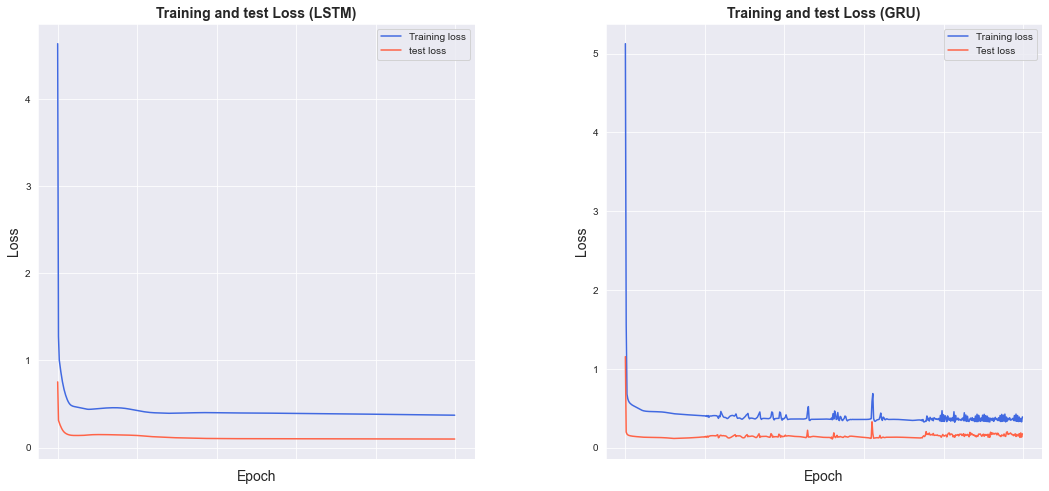

In [174]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = lstm_epochs, y = lstm_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = lstm_epochs, y = lstm_test_losses, label="test loss", color="tomato")
ax.set_title("Training and test Loss (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = gru_epochs, y = gru_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = gru_epochs, y = gru_test_losses, label="Test loss", color="tomato")
ax.set_title("Training and test Loss (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

### 7. *Make predictions*

In [180]:
x_data = torch.Tensor(np.array(x)).unsqueeze(dim=2)
y_data = torch.Tensor(np.array(y))

y_data = pd.DataFrame(scaler.inverse_transform(y_data.detach().numpy()))

lstm_data_predict = []
with torch.no_grad():
    for data in x_data:
        lstm_data_predict.append(lstm(data))
lstm_data_predict = torch.Tensor(lstm_data_predict).unsqueeze(dim=1).numpy()
gru_data_predict = []
with torch.no_grad():
    for data in x_data:
        gru_data_predict.append(gru(data))
gru_data_predict = torch.Tensor(gru_data_predict).unsqueeze(dim=1).numpy()

lstm_data_predict = pd.DataFrame(scaler.inverse_transform(lstm_data_predict))
gru_data_predict = pd.DataFrame(scaler.inverse_transform(gru_data_predict))

## 8. *Compare LSTM and GRU prediction results*

[Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, ''),
 Text(80.0, 0, ''),
 Text(100.0, 0, ''),
 Text(120.0, 0, ''),
 Text(140.0, 0, ''),
 Text(160.0, 0, '')]

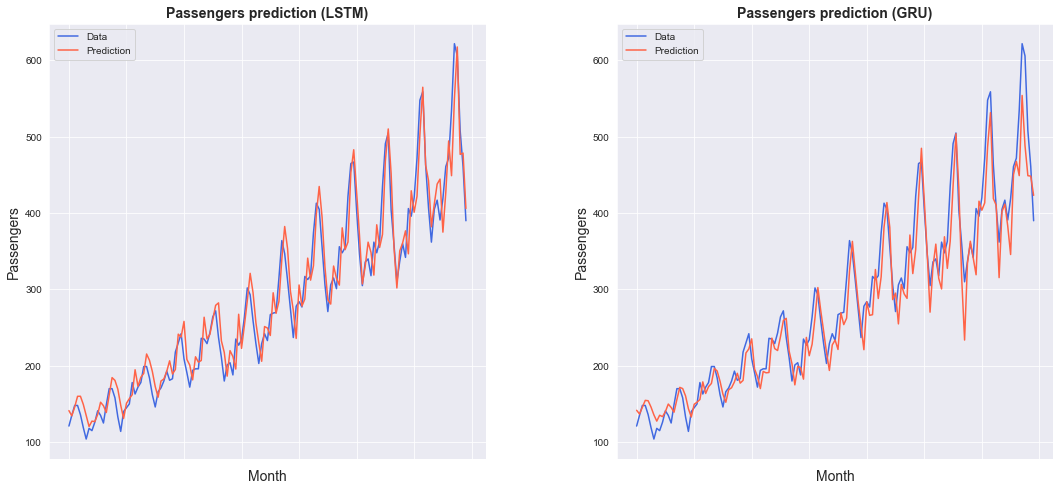

In [181]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = lstm_data_predict.index, y = lstm_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = gru_data_predict.index, y = gru_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)